In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import pickle

from classification import Classification
from ensemble import Ensemble

In [2]:
sns.set_context('poster')

In [3]:
with open("data/X_train_data.pkl", 'rb') as f:
    X_train = pickle.load(f)

In [2]:
with open("data/X_test_data.pkl", 'rb') as f:
    X_test = pickle.load(f)

In [3]:
X_test.to_csv('data/X_test_data.csv')

In [5]:
with open("data/y_train_data.pkl", 'rb') as f:
    y_train = pickle.load(f)

In [4]:
with open("data/y_test_data.pkl", 'rb') as f:
    y_test = pickle.load(f)

In [5]:
y_test.to_csv('data/y_test_data.csv')

In [7]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(5892, 50)
(5892, 1)
(4715, 50)
(4715, 1)


### Best model selection
Based on 3 factors of defining a good model:

    Good Validation Accuracy
    Good Training Accuracy
    Small Difference between Training and Validation Accuracy when using test data and validation accuracy is higher than training which means the model generalise just fine

In [8]:
path = "data/models/all_models.pkl" 

with open(path, 'rb') as f:
    df = pickle.load(f)

df

,Model Name,Train Accuracy,Validation Accuracy,Accuracy Difference
0,Decision Tree,0.449649,0.416836,0.032813
0,Random Forest,0.616655,0.486762,0.129894
0,Logistic Regression,0.530210,0.496945,0.033265
0,SVM,0.631591,0.498982,0.132609
0,Naive Bayes,0.485178,0.460964,0.024214
0,KNN,0.491288,0.477257,0.014030
0,AdaBoost,0.508486,0.481331,0.027155
0,XGBoost,0.712378,0.502376,0.210002


Best model : Random Forest 

In [19]:
path = "data/models/Random Forest.pkl" 

with open(path, 'rb') as f:
    best_model = pickle.load(f)

### Best model tested

In [20]:
best_model.get_test_scores(X_test,y_test)

,Model Name,Train Accuracy,Validation Accuracy,Accuracy Difference
0,Random Forest,0.616655,0.665323,-0.048668


,1,2,3,4,5
precision,0.297566,0.142857,0.080000,0.150862,0.895232
recall,0.677582,0.007752,0.012270,0.312500,0.747967
f1-score,0.413528,0.014706,0.021277,0.203488,0.815001


In [21]:
best_model.classification_report

,1,2,3,4,5
precision,0.545966,0.111111,0.185185,0.416667,0.485669
recall,0.684706,0.007576,0.028902,0.344311,0.745721
f1-score,0.607516,0.014184,0.050000,0.377049,0.588235


Looking at the precision, recall, and f1 score, the scores were higher around scores of 1 and 5, less for 4, and the least for 3 and 2. This shows that the models performs well on more extreme opinions on reviews than mixed opinions.

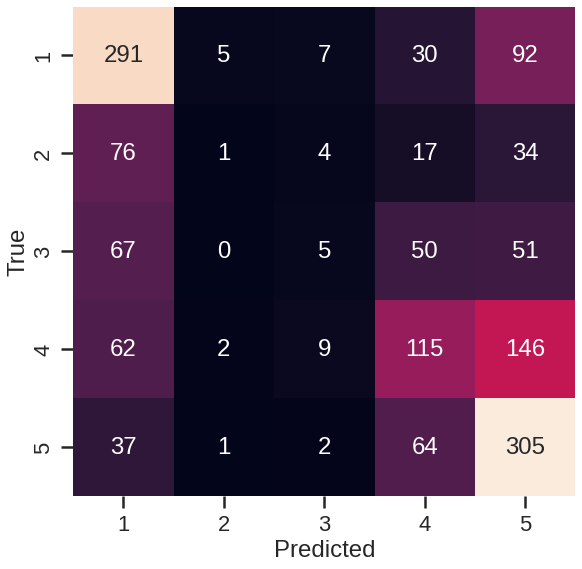

In [22]:
best_model.conf_matrix()

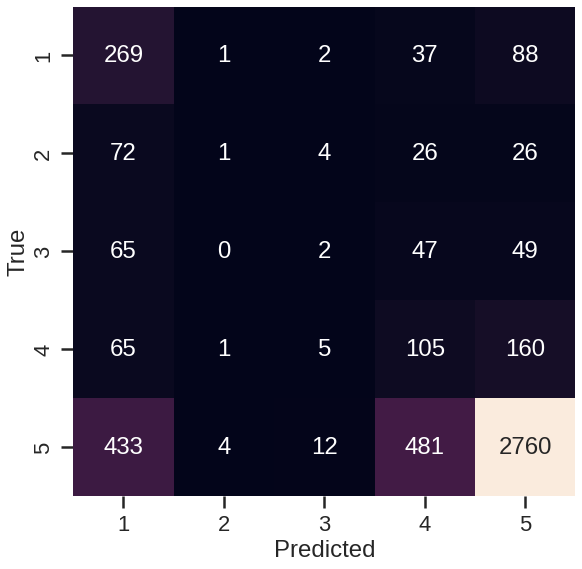

In [23]:
best_model.test_conf_matrix()

15% of reviews that have a score of 5, have been predicted to have a score of 1. It's a lot! And we have 433 reviews that have a score of 5 which have been predicted to 1 and only 269 reviews having a score of 1 predicted to 1. More false predicted than true predicted. The model perform only when it comes to predict reviews that have a score of 5. We might need to consider using neural networks to see an improvement in our prediction.

Future improvements 

- Model using neural networks - see if better accuracy can be achieved
- Create a working application to test new reviews written by people
- Try a different pre-processing approach and see if model performances change
- Bring in new sources of data to see if there are significant differences on frequent words used